In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pykrx import stock

pd.options.display.float_format = '{:.5f}'.format  # 지수표현 없이 출력
# pd.reset_option('display.float_format')          # 되돌리기

In [2]:
# 20100101 ~ 20210831 KOSPI 지수
df = stock.get_index_ohlcv_by_date("20100101", "20210831", '1001') 

In [3]:
# 날짜가 index로 되어있어서 column화
df = df.reset_index()

In [4]:
# 필요 컬럼만 남기기(날짜, 종가)
df = df[['날짜','종가']]

In [5]:
# 월별 마지막 날짜(last_day) 컬럼 만들기
df['yyyymm'] = df.날짜.astype(str).apply(lambda x: x.replace("-","")[:6])
df['day'] = df.날짜.astype(str).apply(lambda x: x.replace("-","")[6:]).astype(int)
temp = df.groupby("yyyymm").day.max()
temp = pd.DataFrame(temp)
temp.columns = ['last_day']
df = pd.merge(df,temp,on='yyyymm')

In [6]:
# 월별 마지막 일자 데이터만 남기기
df = df[df.day==df.last_day]
df.reset_index(drop=True, inplace=True)

In [7]:
df

,날짜,종가,yyyymm,day,last_day
0,2010-01-29,1602.43000,201001,29,29
1,2010-02-26,1594.58000,201002,26,26
2,2010-03-31,1692.85000,201003,31,31
3,2010-04-30,1741.56000,201004,30,30
4,2010-05-31,1641.25000,201005,31,31
...,...,...,...,...,...
135,2021-04-30,3147.86000,202104,30,30
136,2021-05-31,3203.92000,202105,31,31
137,2021-06-30,3296.68000,202106,30,30
138,2021-07-30,3202.32000,202107,30,30


In [8]:
df['월수익률'] = 0.0

for idx, data in df.iterrows() :
    if idx == 0:
        continue
    else:
        df.loc[idx,'월수익률'] = (data['종가'] / df.loc[idx-1,'종가'] - 1) * 100

In [9]:
df

,날짜,종가,yyyymm,day,last_day,월수익률
0,2010-01-29,1602.43000,201001,29,29,0.00000
1,2010-02-26,1594.58000,201002,26,26,-0.48988
2,2010-03-31,1692.85000,201003,31,31,6.16275
3,2010-04-30,1741.56000,201004,30,30,2.87740
4,2010-05-31,1641.25000,201005,31,31,-5.75978
...,...,...,...,...,...,...
135,2021-04-30,3147.86000,202104,30,30,2.82353
136,2021-05-31,3203.92000,202105,31,31,1.78089
137,2021-06-30,3296.68000,202106,30,30,2.89520
138,2021-07-30,3202.32000,202107,30,30,-2.86227


In [10]:
df['기간수익률'] = 0.0

for idx, data in df.iterrows() :
    if idx < 12:
        continue
    elif df.loc[idx-12,'월수익률'] == 0.0 :
        df.loc[idx,'기간수익률'] = 0.0
    else:
        df.loc[idx,'기간수익률'] = (data['월수익률'] / df.loc[idx-12,'월수익률'] - 1) * 100

In [11]:
# 캡스톤 프로젝트에서 사용할 2011년부터 데이터만 남기기
df = df.iloc[12:,:]
df.reset_index(drop=True, inplace=True)
KOSPI_RETURNS = df[['날짜','yyyymm','종가','월수익률','기간수익률']]
KOSPI_RETURNS.set_index('날짜',inplace=True, drop=True)
KOSPI_RETURNS.columns = ['yyyymm','close_price','m_return','one_y_returns']

In [12]:
KOSPI_RETURNS

,yyyymm,close_price,m_return,one_y_returns
날짜,,,,
2011-01-31,201101,2069.73000,0.91321,0.00000
2011-02-28,201102,1939.30000,-6.30179,1186.39164
2011-03-31,201103,2106.70000,8.63198,40.06700
2011-04-29,201104,2192.36000,4.06607,41.31092
2011-05-31,201105,2142.47000,-2.27563,-60.49102
...,...,...,...,...
2021-04-30,202104,3147.86000,2.82353,-74.31955
2021-05-31,202105,3203.92000,1.78089,-57.72312
2021-06-30,202106,3296.68000,2.89520,-25.36384


In [13]:
KOSPI_RETURNS.describe()

,close_price,m_return,one_y_returns
count,128.00000,128.00000,128.00000
mean,2153.91211,0.43475,-16.50582
std,316.52076,4.17526,725.42087
min,1754.64000,-13.37476,-2557.04715
25%,1977.58000,-1.87864,-174.55159
50%,2032.45000,0.74489,-104.03477
75%,2204.99750,2.85588,6.12571
max,3296.68000,14.29945,6550.13836


# 시각화

In [14]:
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False 

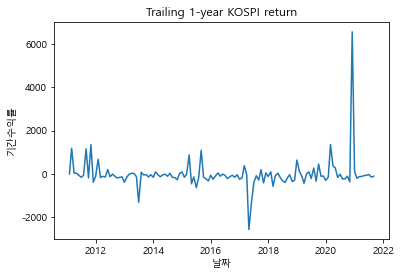

In [15]:
plt.plot(KOSPI_RETURNS.one_y_returns)
plt.title('Trailing 1-year KOSPI return')
plt.xlabel('날짜')
plt.ylabel('기간수익률')
plt.show()

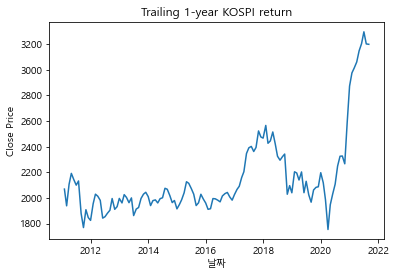

In [16]:
plt.plot(KOSPI_RETURNS.close_price)
plt.title('Trailing 1-year KOSPI return')
plt.xlabel('날짜')
plt.ylabel('Close Price')
plt.show()
